In [1]:
#import matplotlib as mpl
#mpl.use('Agg')

#this script relies on data output by 7a and 7b.
import pandas as pd
import numpy as np
import os, sys
import itertools

#from tf_keras_vis.utils import normalize

import json
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib as mpl
#matplotlib.use('PS')

from matplotlib.ticker import FormatStrFormatter

In [2]:
#find, import, and organize figure data from all previous runs of scripts 7a and 7b.
avail_data = pd.DataFrame([x for x in os.listdir("../figures/") if x[-4:]==".csv"], columns=["Files"])
avail_data["Method"] = avail_data["Files"].str.split("reps_val_training_", expand=True)[1]
avail_data["Method"] = avail_data["Method"].str.split("_sal_", expand=True)[0]
avail_data["Sum_type"] = avail_data["Files"].str.split("_sal_", expand=True)[1].str[:-4]

#add extra column with testing scenario
avail_data["Scenario"] = avail_data["Method"].str[-10:]
repl = {'_23Apr2020':"G holdout", '13_Dec2019':"GEM hard", '_26Feb2020':"GEM Practical", '_24Apr2020':"E holdout"}
for key in repl:
    #print(key)
    avail_data["Scenario"] = avail_data["Scenario"].str.replace(key, repl[key])
avail_data

#add column for data provided to model
avail_data["Data_provided"] = avail_data["Method"].str.contains("NO_HIST")
avail_data["Data_provided"] = avail_data["Data_provided"].replace({True:"NO_HIST", False:np.nan})

tmp = avail_data["Method"].str.contains("G_only").replace({True:"G_only", False:np.nan})
avail_data["Data_provided"] = avail_data["Data_provided"].fillna(tmp)

tmp = avail_data["Method"].str.contains("NO_SOIL").replace({True:"NO_SOIL", False:np.nan})
avail_data["Data_provided"] = avail_data["Data_provided"].fillna(tmp)

tmp = avail_data["Method"].str.contains("NO_WEATH").replace({True:"NO_WEATH", False:np.nan})
avail_data["Data_provided"] = avail_data["Data_provided"].fillna(tmp)

tmp = avail_data["Method"].str.contains("NO_G").replace({True:"NO_G", False:np.nan})
avail_data["Data_provided"] = avail_data["Data_provided"].fillna(tmp)

avail_data["Data_provided"] = avail_data["Data_provided"].fillna("All")

In [ ]:
#pd.set_option('display.max_rows', 300)
#avail_data.sort_values(["Data_provided", "Scenario"])

In [4]:
#import desired data, sum_large_categories
def import_data_sum_large_cats(avail_data):
    to_import = avail_data[avail_data["Sum_type"]=="sum_large_categories"].copy()
    sum_large_cats=[]
    for file1 in to_import["Files"]:
        tmp = pd.read_csv("../figures/"+file1).rename(columns={"Unnamed: 0":"Factor"})
        tmp["Scenario"]=to_import[to_import["Files"]==file1]["Scenario"].iloc[0]
        tmp["Data_provided"]=to_import[to_import["Files"]==file1]["Data_provided"].iloc[0]
        sum_large_cats.append(tmp.copy())
    sum_large_cats = pd.concat(sum_large_cats).reset_index(drop=True)
    return sum_large_cats

def import_data_all(avail_data, sum_type):
    to_import = avail_data[avail_data["Sum_type"]==sum_type].copy()
    all_weather = []
    for file1 in to_import["Files"]:
        tmp = pd.read_csv("../figures/"+file1, index_col=[0,1])#.rename(columns={"Unnamed: 0":"Factor", "Unnamed: 1":"Day"})
        tmp["Scenario"]=to_import[to_import["Files"]==file1]["Scenario"].iloc[0]
        tmp["Data_provided"]=to_import[to_import["Files"]==file1]["Data_provided"].iloc[0]
        all_weather.append(tmp.copy())
    all_weather = pd.concat(all_weather)#.reset_index(drop=True)
    return all_weather

In [5]:
def plot_weather(sng_weather, title, order_inclusion):
    # order_inclusion = which factors to include and their order as a list
    if len(order_inclusion)==0:
        order_inclusion = sng_weather["mean"].unstack().sum(axis=1).sort_values(ascending=False).index
    
    tmp = sng_weather["mean"].unstack().loc[order_inclusion].T.copy()
    tmp_stdErr=sng_weather["stdErr"].unstack().loc[order_inclusion].T.copy()
    
    ax = tmp.plot(figsize=(15,5), yerr=tmp_stdErr)
    
    #https://pydatascience.org/2017/12/05/read-the-data-and-plotting-with-multiple-markers/
    valid_markers = ['.', 'o', 'v', '^', '<', '>','X', 'x', '2', '3', '4', '8', 's', 'p', 'h', 'H', '+', 'D', 'd', '|', '_', 'P', 'X']
    #valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if item[1] is not 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])
    for i, line in enumerate(ax.get_lines()):
        line.set_marker(valid_markers[i])
    
    ax.legend(facecolor="white")
    ax.set_xlabel("Days After Planting")
    ax.set_ylabel("Saliency Score")
    ax.set_title(title)
    ax.set(facecolor = "white")
    ax.grid(color="lightgray", axis='y')
    plt.ylim(0,0.054)
    plt.show()
    #return tmp, ax

In [6]:
order_inclusion = ['Precipitation', 'Minimum Temperature', 'Vapor Pressure', 'Radiation',
                   'Maximum Temperature', 'Day Length','Day of year','Cumulative thermal time']
all_weather = import_data_all(avail_data, sum_type="weather")

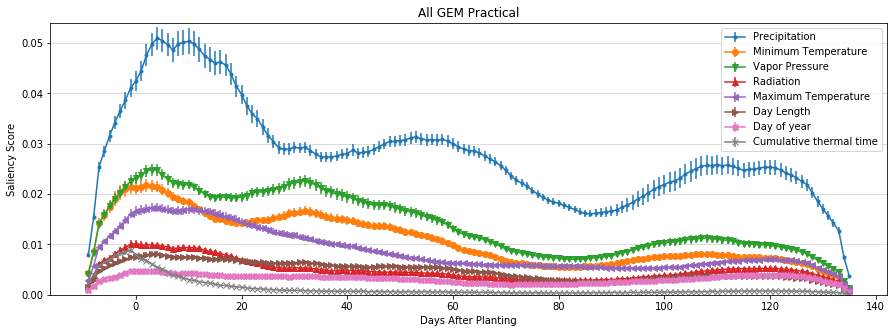

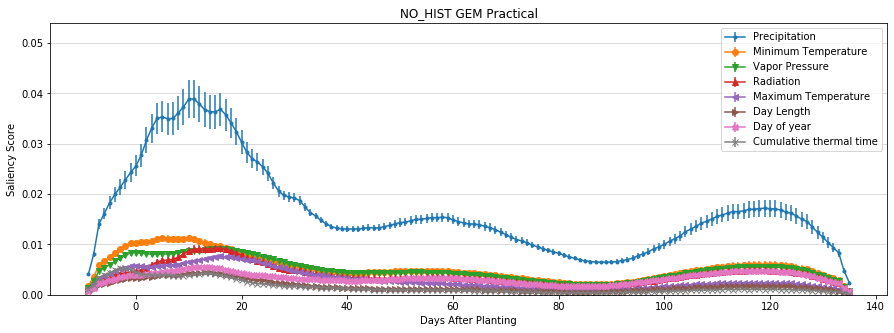

In [7]:
data="All"
scenario="GEM Practical"
sng_weather = all_weather[(all_weather["Scenario"]==scenario) & (all_weather["Data_provided"]==data)].copy()
plot_weather(sng_weather, data+" "+scenario, order_inclusion)

data="NO_HIST"
sng_weather = all_weather[(all_weather["Scenario"]==scenario) & (all_weather["Data_provided"]==data)].copy()
plot_weather(sng_weather, data+" "+scenario, order_inclusion)